<!-- Titre principal centré -->
<center><h2>🚦 Traffic Light Detection / Détection des feux de circulation avec YOLO 🚦</h2></center>




**1- Installation des bibliothèques**

In [ ]:
# Installation des bibliothèques nécessaires :
# - ultralytics : pour utiliser les modèles YOLO (v8/v11)
# - opencv-python : pour le traitement d'images (lecture, affichage, etc.)
# - matplotlib : pour afficher des courbes, images et visualisations
# - tqdm : pour afficher des barres de progression élégantes pendant l'entraînement ou les boucles
!pip install ultralytics opencv-python matplotlib tqdm -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.3 MB/s eta 0:00:00


**2- Import required libraries**

In [ ]:
import os
import cv2
import shutil
import torch
import torchvision
import numpy as np
import glob
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**3- Vérification du GPU**

In [ ]:
import torch
if torch.cuda.is_available():
    print("✅ GPU is available !")
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
else:
    print("❌ GPU is not available.")

✅ GPU is available !
GPU Name: NVIDIA A100-SXM4-40GB


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

**4- Téléchargement et préparation du dataset**

In [ ]:
import os
HOME =os.getcwd()
print(HOME)

/content


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="WOEIhHEtFCkiw7ijksRS")
project = rf.workspace("iaagl").project("traffic-lights-rqds4")
version = project.version(3)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 117.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to traffic-lights-3 in yolov11:: 100%|██████████| 41694/41694 [00:06<00:00, 6433.02it/s]


In [ ]:
yaml_path= "/content/traffic-lights-3/data.yaml"

**5- Chargement du modèle pré-entraîné**

In [ ]:
model = YOLO("yolo11m.pt")

100%|██████████| 38.8M/38.8M [00:00<00:00, 189MB/s]


**6- Entraînement du modèle**

In [ ]:
model.train(
    data=yaml_path,                       # Path of dataset YAML file
    epochs=100,                           # epochs
    imgsz=512,                            # image size to capture fine details
    batch=32,                             # batch size
    optimizer="AdamW",                    # AdamW optimizer for stable convergence
    lr0=5e-4,                             # Lower initial learning rate for smoother training
    lrf=0.01,                             # Final learning rate factor
    momentum=0.937,                       # Momentum to smooth gradient updates
    weight_decay=5e-4,                    # Weight decay to reduce overfitting
    patience=10,                          # Early stopping patience to avoid overtraining
    device=device,                        # Use the GPU
    half=True,                            # Mixed precision training for faster computation & lower memory usage
    workers=8,                            # Number of dataloader workers for faster data loading
    project="./nirikshan_Yolo11_model",  # Directory where training results will be saved
    name="nirikshan",                     # Experiment name
    cache=False,                           # Not Cache images in RAM to speed up training
    augment=True,                          # Enable augmentations for better generalization
    hsv_h=0.015,                               # Hue augmentation
    hsv_s=0.8,                            # Saturation augmentation
    hsv_v=0.5,                              # Brightness augmentation
    degrees=5,                          # Small rotation augmentation (degrees)
    translate=0.1,                       # Translation augmentation factor
    scale=0.5,                            # Scaling augmentation factor
    shear=2.0,                           # Shear augmentation in degrees
    perspective=0.0005,                  # Perspective transformation augmentation
    flipud=0.0,                          # Vertical flip probability (set to 0 if not needed)
    fliplr=0.5,                          # Horizontal flip probability
    mosaic=True,                         # Enable mosaic augmentation for richer image combinations
    mixup=0.2,                           # Enable mixup to improve robustness
    label_smoothing=0.1,                 # Apply label smoothing to reduce overconfidence
    plots=True,                          # Generate and save training plots (loss, mAP, etc.)
    save_period=5,                       # Save a checkpoint every 5 epochs
    verbose=True,                        # Enable verbose logging for detailed output
    cos_lr=True,                         # Use cosine learning rate scheduler for smooth decay
    warmup_epochs=5,                     # Gradually warm up the learning rate over 5 epochs
    freeze=0,                            # Train all layers (no freezing)
)


WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/traffic-lights-3/data.yaml, degrees=5, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=0, half=True, hsv_h=0.015, hsv_s=0.8, hsv_v=0.5, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=True, multi_scale=False, name=nirikshan, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=10, perspective=0.0005, plots=True, pose=12.0, pr

100%|██████████| 755k/755k [00:00<00:00, 13.6MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

  8                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1    990976  ultralytics.nn.modules.block.C2PSA           [512, 512, 1]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  1   1642496  ultralytics.nn.modules.block.C3k2            [1024, 512, 1, True]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  1    542720  ultralytics.nn.modules.block.C3k2            [1024

100%|██████████| 5.35M/5.35M [00:00<00:00, 60.6MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1418.8±426.1 MB/s, size: 41.8 KB)


train: Scanning /content/traffic-lights-3/train/labels... 18207 images, 1203 backgrounds, 0 corrupt: 100%|██████████| 18207/18207 [00:11<00:00, 1585.30it/s]


train: New cache created: /content/traffic-lights-3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 707.1±320.6 MB/s, size: 47.7 KB)


val: Scanning /content/traffic-lights-3/valid/labels... 1755 images, 125 backgrounds, 0 corrupt: 100%|██████████| 1755/1755 [00:01<00:00, 1284.07it/s]


val: New cache created: /content/traffic-lights-3/valid/labels.cache
Plotting labels to nirikshan_Yolo11_model/nirikshan/labels.jpg... 
optimizer: AdamW(lr=0.0005, momentum=0.937) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to nirikshan_Yolo11_model/nirikshan
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      9.81G      1.056      1.109       1.12         85        512: 100%|██████████| 569/569 [01:51<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.44it/s]


                   all       1755       2568       0.87      0.715      0.804      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      11.9G      1.023     0.9091      1.109         82        512: 100%|██████████| 569/569 [01:50<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.71it/s]


                   all       1755       2568      0.795      0.737      0.796      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      11.9G     0.9998     0.8514      1.094         84        512: 100%|██████████| 569/569 [01:46<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.82it/s]

                   all       1755       2568      0.888      0.824      0.874      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100        12G     0.9623     0.8032       1.08         78        512: 100%|██████████| 569/569 [01:40<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.78it/s]

                   all       1755       2568      0.928      0.821       0.89      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      12.1G     0.9681     0.7938      1.081        104        512: 100%|██████████| 569/569 [01:41<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.77it/s]

                   all       1755       2568      0.889      0.804      0.876      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      12.1G     0.9469     0.7692      1.067         83        512: 100%|██████████| 569/569 [01:41<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.80it/s]


                   all       1755       2568      0.918      0.854      0.908      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      12.2G     0.9291     0.7346       1.06         99        512: 100%|██████████| 569/569 [01:41<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.80it/s]

                   all       1755       2568      0.923      0.856      0.914      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      12.3G     0.9145     0.7154      1.056         91        512: 100%|██████████| 569/569 [01:40<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.82it/s]

                   all       1755       2568      0.934      0.873      0.931      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      12.3G     0.9003     0.6953      1.049         86        512: 100%|██████████| 569/569 [01:41<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.82it/s]

                   all       1755       2568      0.934      0.879      0.926      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      12.4G     0.8856     0.6779      1.038        103        512: 100%|██████████| 569/569 [01:41<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.84it/s]

                   all       1755       2568       0.94      0.883      0.933      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      12.5G     0.8839     0.6642      1.036         86        512: 100%|██████████| 569/569 [01:41<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.84it/s]

                   all       1755       2568      0.942      0.874      0.936      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      12.5G     0.8761     0.6498      1.033         88        512: 100%|██████████| 569/569 [01:41<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.80it/s]

                   all       1755       2568      0.943      0.901      0.942      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      12.6G     0.8658     0.6375      1.028         62        512: 100%|██████████| 569/569 [01:41<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.86it/s]

                   all       1755       2568      0.955      0.867       0.94       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      12.7G     0.8568      0.625      1.024         84        512: 100%|██████████| 569/569 [01:41<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.83it/s]

                   all       1755       2568      0.958      0.887      0.943      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      12.7G     0.8524     0.6171      1.019         68        512: 100%|██████████| 569/569 [01:41<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.85it/s]

                   all       1755       2568      0.952      0.894      0.948      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      12.8G     0.8421      0.609      1.016         75        512: 100%|██████████| 569/569 [01:41<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.83it/s]

                   all       1755       2568      0.951      0.902      0.951      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      12.9G     0.8322     0.5997      1.011        104        512: 100%|██████████| 569/569 [01:41<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.80it/s]

                   all       1755       2568      0.955      0.898      0.952       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      12.9G     0.8334     0.5933      1.013         83        512: 100%|██████████| 569/569 [01:41<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.77it/s]

                   all       1755       2568      0.956      0.902      0.951       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100        13G     0.8355     0.5874      1.013         79        512: 100%|██████████| 569/569 [01:41<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.85it/s]

                   all       1755       2568      0.934      0.921      0.952      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      13.1G     0.8225     0.5797      1.011         87        512: 100%|██████████| 569/569 [01:41<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.85it/s]

                   all       1755       2568      0.958      0.902      0.957      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      13.1G     0.8172     0.5725      1.005         80        512: 100%|██████████| 569/569 [01:41<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.82it/s]

                   all       1755       2568      0.949      0.904      0.954      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      13.2G     0.8167     0.5691      1.004        113        512: 100%|██████████| 569/569 [01:41<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.82it/s]

                   all       1755       2568      0.943      0.923      0.958      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      13.3G     0.8092     0.5633          1         76        512: 100%|██████████| 569/569 [01:41<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.82it/s]

                   all       1755       2568      0.941      0.916      0.951      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      13.3G     0.8064     0.5574     0.9984         80        512: 100%|██████████| 569/569 [01:41<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.81it/s]

                   all       1755       2568      0.938      0.928      0.955      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      13.4G      0.801     0.5497     0.9983         89        512: 100%|██████████| 569/569 [01:41<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.79it/s]

                   all       1755       2568      0.949      0.908      0.958      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      13.5G     0.7965     0.5463     0.9967         73        512: 100%|██████████| 569/569 [01:41<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.82it/s]

                   all       1755       2568      0.928      0.923      0.952      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      13.5G     0.7874     0.5384     0.9946        103        512: 100%|██████████| 569/569 [01:41<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.80it/s]

                   all       1755       2568      0.934      0.928      0.958      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      13.6G     0.7867     0.5407     0.9927         80        512: 100%|██████████| 569/569 [01:41<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.84it/s]

                   all       1755       2568       0.94      0.919      0.961      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      13.7G     0.7879     0.5342     0.9913         93        512: 100%|██████████| 569/569 [01:41<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.83it/s]

                   all       1755       2568      0.944      0.923       0.96      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      13.7G     0.7818     0.5278     0.9935        104        512: 100%|██████████| 569/569 [01:41<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.82it/s]

                   all       1755       2568      0.949      0.918       0.96       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      13.8G     0.7793     0.5252      0.989         94        512: 100%|██████████| 569/569 [01:41<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.83it/s]

                   all       1755       2568       0.93      0.936      0.964      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      13.9G      0.774     0.5196     0.9881         88        512: 100%|██████████| 569/569 [01:41<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.80it/s]

                   all       1755       2568      0.945       0.93      0.963      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      13.9G     0.7805     0.5228     0.9867         88        512: 100%|██████████| 569/569 [01:41<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.76it/s]

                   all       1755       2568      0.943      0.928      0.961      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100        14G     0.7677     0.5151     0.9843         84        512: 100%|██████████| 569/569 [01:41<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.83it/s]

                   all       1755       2568      0.942       0.93      0.964       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      14.1G     0.7658     0.5065      0.981         77        512: 100%|██████████| 569/569 [01:41<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.83it/s]

                   all       1755       2568      0.934      0.938      0.965      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      14.1G     0.7596     0.5036     0.9828         82        512: 100%|██████████| 569/569 [01:41<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.79it/s]

                   all       1755       2568      0.946      0.924      0.962      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      14.2G     0.7522     0.4989     0.9773        101        512: 100%|██████████| 569/569 [01:41<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.80it/s]

                   all       1755       2568      0.946      0.922      0.961      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      14.2G     0.7535     0.4941     0.9793        101        512: 100%|██████████| 569/569 [01:41<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.84it/s]

                   all       1755       2568       0.95      0.925      0.962      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      14.3G     0.7517     0.4907     0.9779         52        512: 100%|██████████| 569/569 [01:42<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.82it/s]

                   all       1755       2568      0.955      0.925      0.964      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      14.4G     0.7438     0.4848     0.9706         87        512: 100%|██████████| 569/569 [01:41<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.77it/s]

                   all       1755       2568      0.957       0.92      0.964      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      14.4G     0.7445     0.4834     0.9717         82        512: 100%|██████████| 569/569 [01:41<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.82it/s]

                   all       1755       2568      0.941      0.934      0.964        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      14.5G     0.7385     0.4777     0.9732        111        512: 100%|██████████| 569/569 [01:41<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.77it/s]

                   all       1755       2568      0.943      0.937      0.966        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      14.6G     0.7292     0.4756     0.9709        113        512: 100%|██████████| 569/569 [01:41<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.78it/s]

                   all       1755       2568      0.943      0.934      0.965      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      14.6G     0.7355     0.4745     0.9685         79        512: 100%|██████████| 569/569 [01:41<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.78it/s]

                   all       1755       2568      0.947      0.928      0.963      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      14.7G       0.73     0.4748     0.9693         78        512: 100%|██████████| 569/569 [01:41<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.80it/s]

                   all       1755       2568      0.947      0.935      0.965      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      14.8G     0.7236     0.4645     0.9665         98        512: 100%|██████████| 569/569 [01:41<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.79it/s]

                   all       1755       2568      0.945      0.936      0.967      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      14.8G     0.7257     0.4651     0.9651         99        512: 100%|██████████| 569/569 [01:41<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.81it/s]

                   all       1755       2568      0.946      0.936      0.968      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      14.9G     0.7189     0.4607     0.9632         87        512: 100%|██████████| 569/569 [01:41<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.76it/s]

                   all       1755       2568      0.943      0.936      0.969      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      15.8G     0.7167     0.4578     0.9622         90        512: 100%|██████████| 569/569 [01:41<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.78it/s]

                   all       1755       2568      0.947      0.933      0.969      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      15.9G     0.7126     0.4567     0.9616         88        512: 100%|██████████| 569/569 [01:41<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.80it/s]

                   all       1755       2568      0.943      0.937      0.967      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100        16G     0.7139     0.4549     0.9613         79        512: 100%|██████████| 569/569 [01:41<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.82it/s]

                   all       1755       2568      0.941       0.94      0.968      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100        16G     0.7098     0.4534     0.9597         74        512: 100%|██████████| 569/569 [01:41<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.81it/s]

                   all       1755       2568      0.941      0.938      0.968      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      16.1G     0.7066     0.4456     0.9576        100        512: 100%|██████████| 569/569 [01:41<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.81it/s]

                   all       1755       2568       0.94      0.941      0.969      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      16.2G     0.7037     0.4415     0.9585         89        512: 100%|██████████| 569/569 [01:41<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.83it/s]

                   all       1755       2568       0.94      0.942      0.969      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      16.2G     0.6961     0.4369     0.9556         80        512: 100%|██████████| 569/569 [01:41<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.81it/s]

                   all       1755       2568       0.94      0.943      0.969      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      16.3G      0.696     0.4381     0.9542         67        512: 100%|██████████| 569/569 [01:41<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.77it/s]

                   all       1755       2568       0.94      0.942      0.969      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      16.4G     0.6984     0.4382     0.9537         86        512: 100%|██████████| 569/569 [01:41<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.81it/s]

                   all       1755       2568       0.94      0.944      0.969       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      16.4G      0.688     0.4281      0.951        103        512: 100%|██████████| 569/569 [01:41<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.78it/s]

                   all       1755       2568      0.939      0.945      0.969      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      16.5G     0.6849     0.4261     0.9485         91        512: 100%|██████████| 569/569 [01:41<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.80it/s]

                   all       1755       2568       0.94      0.944      0.969      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      16.6G      0.689     0.4272      0.949         87        512: 100%|██████████| 569/569 [01:41<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.76it/s]

                   all       1755       2568       0.94      0.945      0.969      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      16.6G     0.6845     0.4249     0.9492         82        512: 100%|██████████| 569/569 [01:41<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.76it/s]

                   all       1755       2568       0.94      0.946      0.969      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      16.7G     0.6825     0.4224     0.9435         68        512: 100%|██████████| 569/569 [01:41<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.74it/s]

                   all       1755       2568      0.959      0.924      0.968      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      16.8G     0.6766     0.4199      0.944         97        512: 100%|██████████| 569/569 [01:41<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.82it/s]

                   all       1755       2568      0.939      0.945      0.969      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      16.8G      0.676     0.4176     0.9427         90        512: 100%|██████████| 569/569 [01:41<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.76it/s]

                   all       1755       2568      0.939      0.945       0.97      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      16.9G     0.6746     0.4117     0.9434         96        512: 100%|██████████| 569/569 [01:41<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.75it/s]

                   all       1755       2568      0.939      0.944       0.97      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100        17G     0.6689     0.4092     0.9427         90        512: 100%|██████████| 569/569 [01:41<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.79it/s]

                   all       1755       2568      0.939      0.945       0.97      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100        17G     0.6705      0.412     0.9448         98        512: 100%|██████████| 569/569 [01:41<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.81it/s]

                   all       1755       2568      0.939      0.945       0.97      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      17.1G     0.6639     0.4057     0.9444         81        512: 100%|██████████| 569/569 [01:41<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.79it/s]

                   all       1755       2568      0.952      0.933       0.97      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      17.2G     0.6626     0.4062     0.9431         76        512: 100%|██████████| 569/569 [01:41<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.81it/s]

                   all       1755       2568      0.952      0.933       0.97      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      17.3G     0.6591     0.4002     0.9414        101        512: 100%|██████████| 569/569 [01:41<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.77it/s]

                   all       1755       2568      0.953      0.932       0.97      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      17.4G     0.6637     0.4008     0.9427         73        512: 100%|██████████| 569/569 [01:41<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.78it/s]

                   all       1755       2568      0.952       0.93       0.97      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      17.6G     0.6621     0.3957     0.9399         89        512: 100%|██████████| 569/569 [01:41<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.79it/s]

                   all       1755       2568      0.953       0.93       0.97      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      17.7G     0.6575     0.3981     0.9378         66        512: 100%|██████████| 569/569 [01:41<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.78it/s]

                   all       1755       2568      0.953       0.93       0.97      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      17.8G     0.6592     0.3947      0.939         77        512: 100%|██████████| 569/569 [01:41<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.81it/s]

                   all       1755       2568      0.953       0.93       0.97       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      17.9G     0.6459     0.3915     0.9335         64        512: 100%|██████████| 569/569 [01:41<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.72it/s]

                   all       1755       2568      0.954      0.932       0.97       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100        18G     0.6435     0.3931     0.9332         92        512: 100%|██████████| 569/569 [01:41<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.76it/s]

                   all       1755       2568      0.954      0.932       0.97       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      18.1G     0.6448      0.389     0.9321         76        512: 100%|██████████| 569/569 [01:41<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.77it/s]

                   all       1755       2568      0.955      0.932       0.97      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      18.2G     0.6433     0.3854     0.9326         92        512: 100%|██████████| 569/569 [01:41<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.74it/s]

                   all       1755       2568      0.955      0.932       0.97      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      18.3G     0.6469     0.3871     0.9334        106        512: 100%|██████████| 569/569 [01:41<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.75it/s]

                   all       1755       2568      0.955      0.932       0.97      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      18.5G     0.6445     0.3867     0.9342         69        512: 100%|██████████| 569/569 [01:41<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.83it/s]

                   all       1755       2568      0.954      0.932       0.97      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      18.5G     0.6424     0.3865     0.9329         96        512: 100%|██████████| 569/569 [01:41<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.81it/s]

                   all       1755       2568      0.954      0.932       0.97      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      18.7G     0.6396      0.383     0.9335         99        512: 100%|██████████| 569/569 [01:41<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.78it/s]

                   all       1755       2568      0.954      0.933      0.971      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      18.8G     0.6401      0.381     0.9313         98        512: 100%|██████████| 569/569 [01:41<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.80it/s]

                   all       1755       2568      0.954      0.934      0.971      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      18.9G     0.6393     0.3832     0.9311         81        512: 100%|██████████| 569/569 [01:41<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.80it/s]

                   all       1755       2568      0.956      0.936      0.973      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100        19G     0.6309     0.3744     0.9282         88        512: 100%|██████████| 569/569 [01:41<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.78it/s]

                   all       1755       2568      0.952      0.939      0.973      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      19.2G     0.6383     0.3785     0.9319         99        512: 100%|██████████| 569/569 [01:42<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.81it/s]

                   all       1755       2568      0.953      0.939      0.973      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      19.2G     0.6352     0.3772     0.9315         81        512: 100%|██████████| 569/569 [01:41<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.81it/s]

                   all       1755       2568      0.953      0.939      0.973      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      19.4G     0.6349     0.3743      0.931         82        512: 100%|██████████| 569/569 [01:41<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.78it/s]

                   all       1755       2568      0.951      0.939      0.973      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      19.5G     0.6328     0.3748      0.928         87        512: 100%|██████████| 569/569 [01:41<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.80it/s]

                   all       1755       2568      0.951       0.94      0.973      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      19.6G     0.6253     0.3717     0.9285         95        512: 100%|██████████| 569/569 [01:41<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.82it/s]

                   all       1755       2568      0.951      0.941      0.973      0.736


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      19.7G     0.5645      0.261     0.8665         42        512: 100%|██████████| 569/569 [01:41<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.77it/s]

                   all       1755       2568      0.951      0.942      0.973      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      19.8G     0.5568     0.2544     0.8636         38        512: 100%|██████████| 569/569 [01:40<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.82it/s]

                   all       1755       2568      0.951      0.942      0.973      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100        11G     0.5577      0.254      0.866         56        512: 100%|██████████| 569/569 [01:40<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.83it/s]

                   all       1755       2568      0.951      0.943      0.973      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      12.4G     0.5513     0.2504     0.8633         43        512: 100%|██████████| 569/569 [01:40<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.83it/s]

                   all       1755       2568      0.952      0.941      0.973      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      12.4G     0.5552     0.2505     0.8651         41        512: 100%|██████████| 569/569 [01:40<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.88it/s]

                   all       1755       2568      0.953      0.943      0.973      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      12.4G     0.5521     0.2507     0.8631         50        512: 100%|██████████| 569/569 [01:40<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.82it/s]

                   all       1755       2568      0.953      0.943      0.973      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      12.4G     0.5511     0.2497     0.8637         53        512: 100%|██████████| 569/569 [01:40<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.83it/s]

                   all       1755       2568      0.953      0.943      0.973      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      12.4G     0.5491     0.2503     0.8643         40        512: 100%|██████████| 569/569 [01:40<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.75it/s]

                   all       1755       2568      0.954      0.943      0.973      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      12.4G     0.5473     0.2471     0.8637         46        512: 100%|██████████| 569/569 [01:40<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.84it/s]

                   all       1755       2568      0.954      0.943      0.973      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      12.4G     0.5475     0.2485     0.8625         48        512: 100%|██████████| 569/569 [01:40<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.81it/s]

                   all       1755       2568      0.955      0.943      0.973      0.739



100 epochs completed in 3.054 hours.
Optimizer stripped from nirikshan_Yolo11_model/nirikshan/weights/last.pt, 40.5MB
Optimizer stripped from nirikshan_Yolo11_model/nirikshan/weights/best.pt, 40.5MB

Validating nirikshan_Yolo11_model/nirikshan/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:12<00:00,  2.31it/s]


                   all       1755       2568      0.949      0.945      0.976       0.74
                 green        800       1080       0.97      0.942      0.977      0.753
                   red        722       1318      0.934      0.957      0.978      0.659
                yellow        161        170      0.943      0.935      0.974      0.807
Speed: 0.1ms preprocess, 3.0ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to nirikshan_Yolo11_model/nirikshan


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x799e3f5eb5d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

**7- Téléchargement du modèle entraîné **

In [ ]:
from google.colab import files
files.download('/content/nirikshan_Yolo11_model/nirikshan/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


**8- Évaluation du modèle sur les données de validation**



In [ ]:
metrics = model.val()
print(metrics)

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 871.3±239.6 MB/s, size: 35.2 KB)


val: Scanning /content/traffic-lights-3/valid/labels.cache... 1755 images, 125 backgrounds, 0 corrupt: 100%|██████████| 1755/1755 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:12<00:00,  4.38it/s]


                   all       1755       2568      0.949      0.945      0.976       0.74
                 green        800       1080       0.97      0.942      0.977      0.753
                   red        722       1318      0.934      0.957      0.978      0.659
                yellow        161        170      0.944      0.935      0.974      0.807
Speed: 0.2ms preprocess, 3.1ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to nirikshan_Yolo11_model/nirikshan2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79a33ca379d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011, 

In [ ]:
model.val(save_json=True, plots=True)

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 882.7±324.3 MB/s, size: 49.9 KB)


val: Scanning /content/traffic-lights-3/valid/labels.cache... 1755 images, 125 backgrounds, 0 corrupt: 100%|██████████| 1755/1755 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:12<00:00,  4.36it/s]


                   all       1755       2568      0.949      0.945      0.976       0.74
                 green        800       1080       0.97      0.942      0.977      0.753
                   red        722       1318      0.934      0.957      0.978      0.659
                yellow        161        170      0.944      0.935      0.974      0.807
Speed: 0.2ms preprocess, 2.8ms inference, 0.0ms loss, 0.8ms postprocess per image
Saving nirikshan_Yolo11_model/nirikshan3/predictions.json...
Results saved to nirikshan_Yolo11_model/nirikshan3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x799f99b14250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

**9-Affichage de la matrice de confusion**

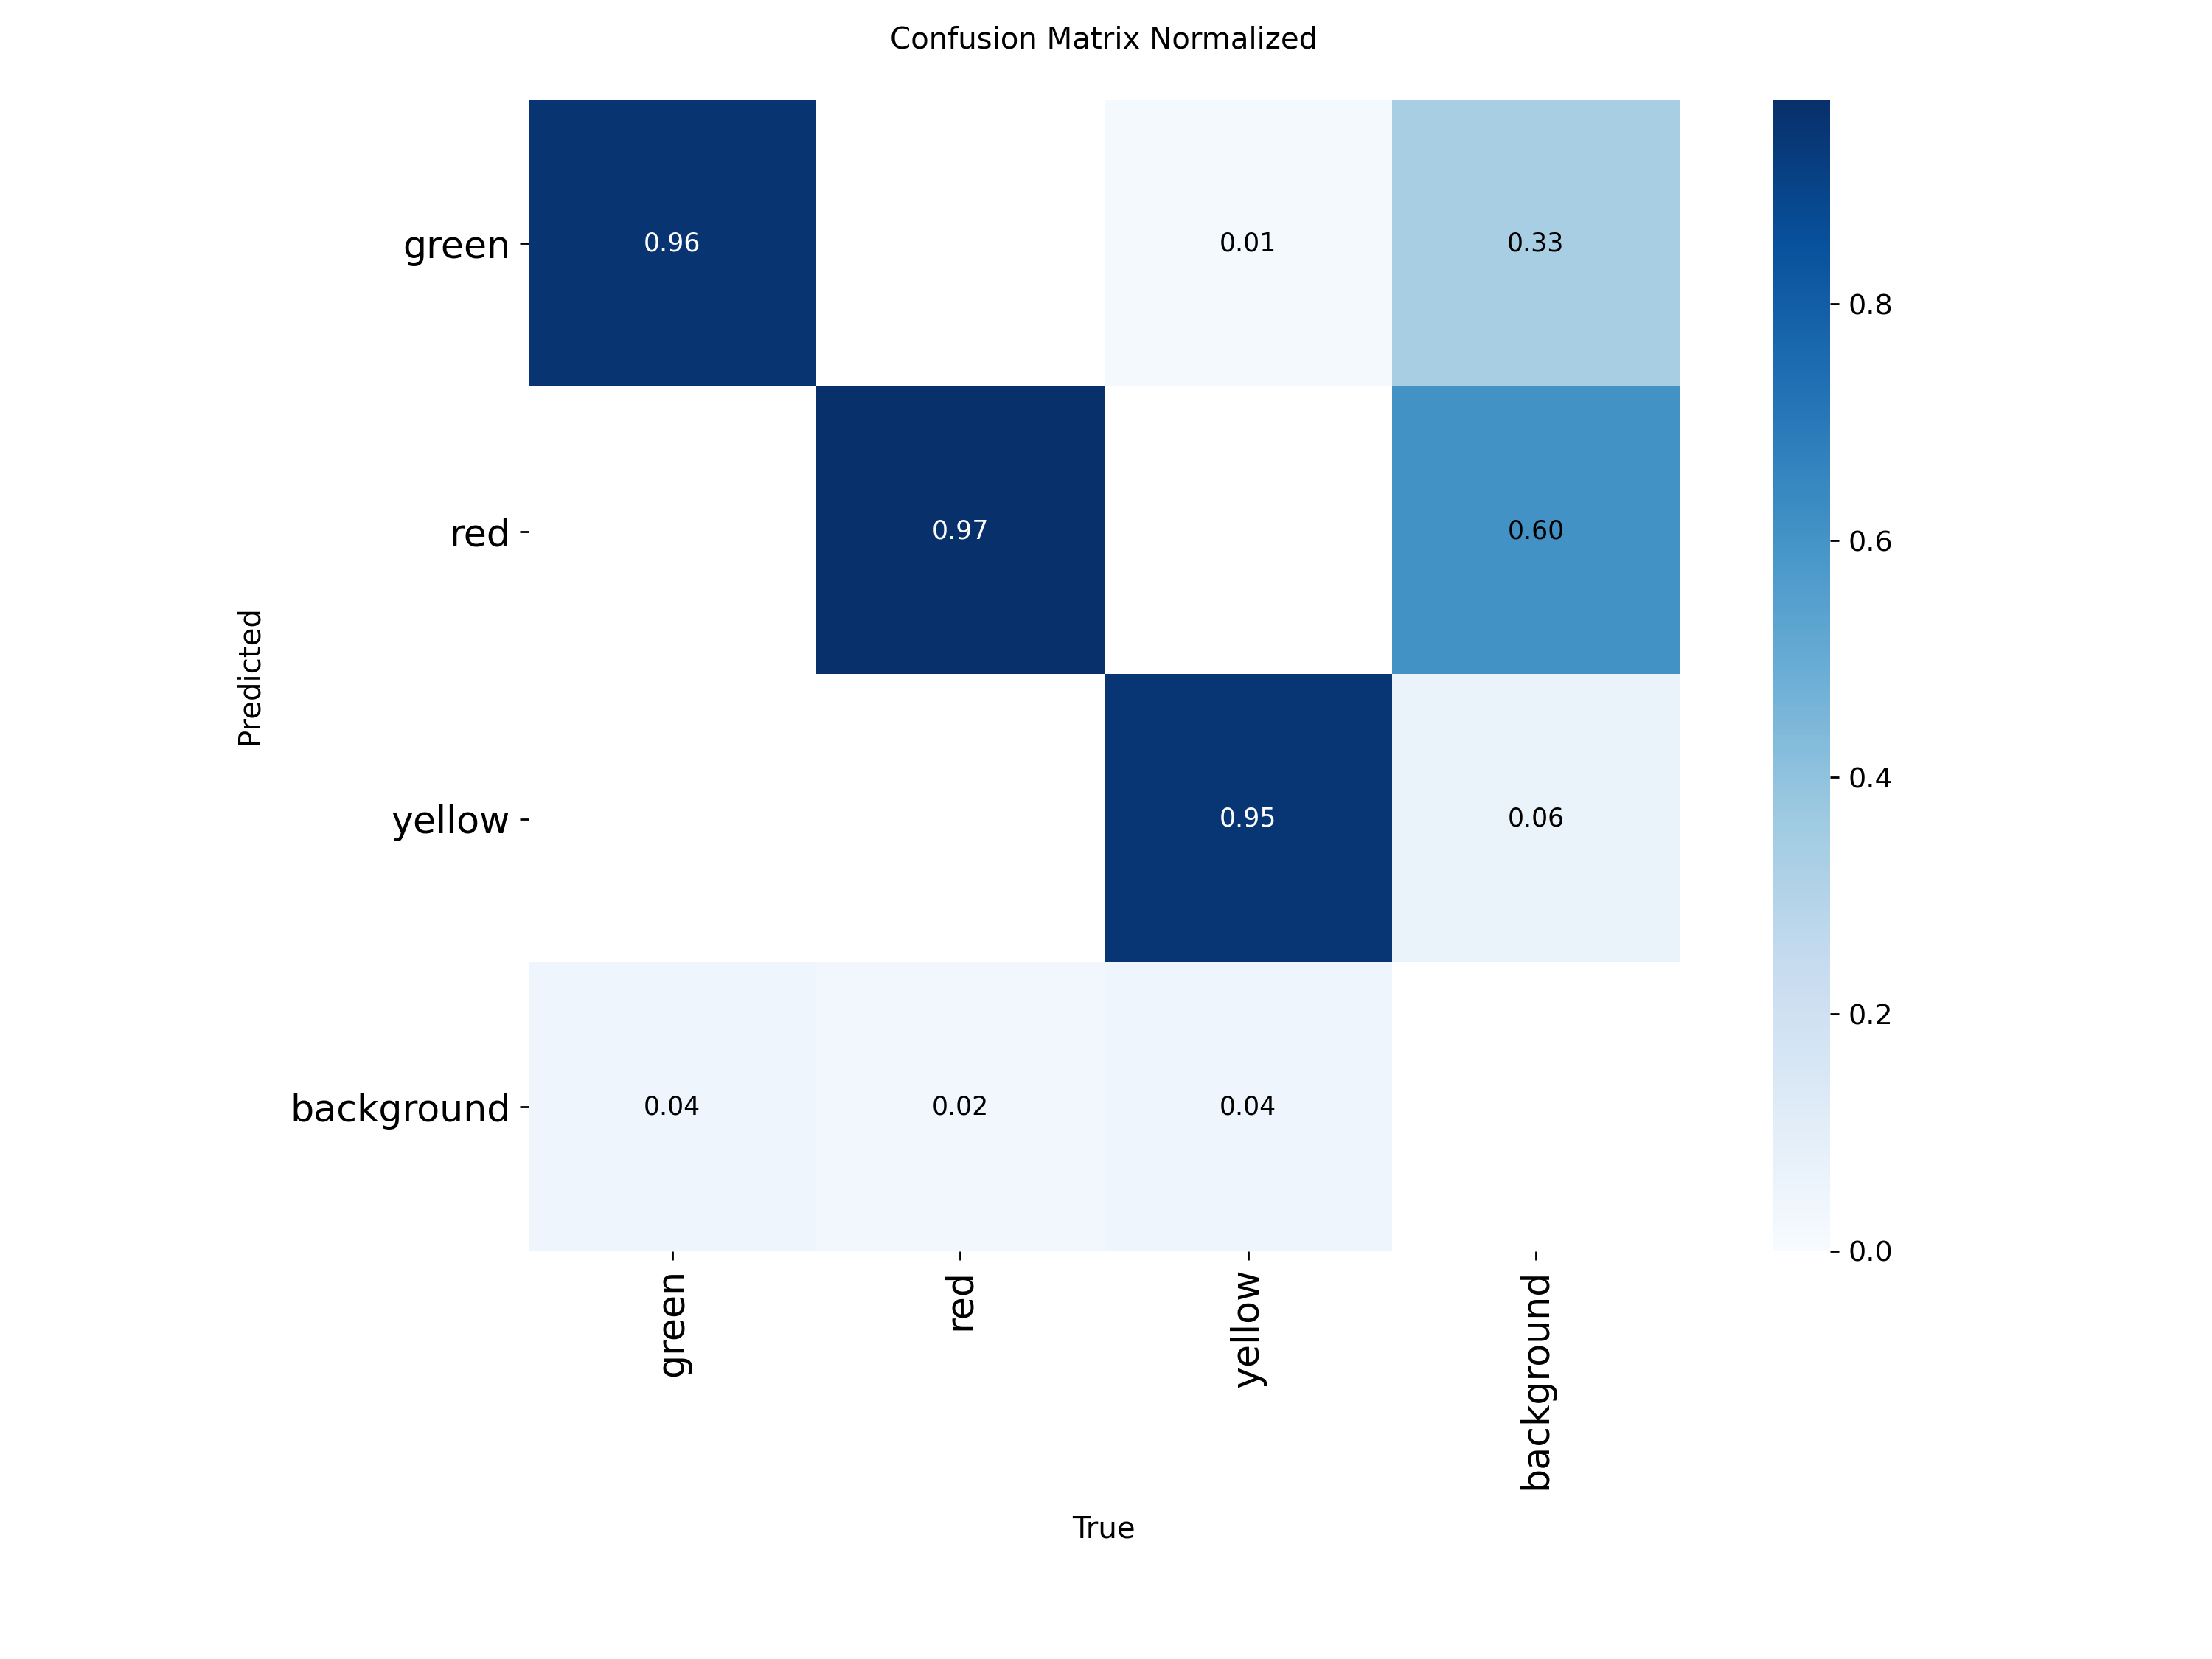

In [ ]:
from IPython.display import Image

Image(filename="/content/nirikshan_Yolo11_model/nirikshan/confusion_matrix_normalized.png", width=600)

**Chargement et affichage des résultats d’évaluation depuis le fichier CSV**

In [ ]:
import pandas as pd

# Lire le fichier CSV
df = pd.read_csv('/content/nirikshan_Yolo11_model/nirikshan/results.csv')

# Afficher les premières lignes du fichier
df.head(-1)

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,120.014,1.05630,1.10921,1.11972,0.86996,0.71528,0.80412,0.45084,1.53454,1.00701,1.23879,0.080135,0.000100,0.000100
1,2,238.860,1.02310,0.90906,1.10861,0.79515,0.73689,0.79563,0.41670,1.69428,1.19840,1.34822,0.060235,0.000200,0.000200
2,3,352.955,0.99979,0.85141,1.09449,0.88801,0.82406,0.87358,0.53159,1.41835,0.80297,1.17694,0.040335,0.000300,0.000300
3,4,462.207,0.96226,0.80323,1.07994,0.92828,0.82082,0.89019,0.55135,1.40505,0.76326,1.16618,0.020434,0.000399,0.000399
4,5,571.810,0.96812,0.79383,1.08102,0.88880,0.80372,0.87595,0.45867,1.63022,0.85492,1.27292,0.000533,0.000498,0.000498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,10451.000,0.55518,0.25052,0.86506,0.95330,0.94276,0.97331,0.73818,0.97319,0.37952,0.97247,0.000009,0.000009,0.000009
95,96,10559.700,0.55213,0.25073,0.86306,0.95287,0.94300,0.97328,0.73789,0.97275,0.37896,0.97223,0.000008,0.000008,0.000008
96,97,10668.500,0.55109,0.24972,0.86365,0.95301,0.94257,0.97306,0.73839,0.97180,0.37887,0.97200,0.000007,0.000007,0.000007
97,98,10777.500,0.54911,0.25025,0.86429,0.95380,0.94254,0.97307,0.73861,0.97110,0.37896,0.97181,0.000006,0.000006,0.000006


**Affichage des prédictions du modèle sur un batch d’images de validation**

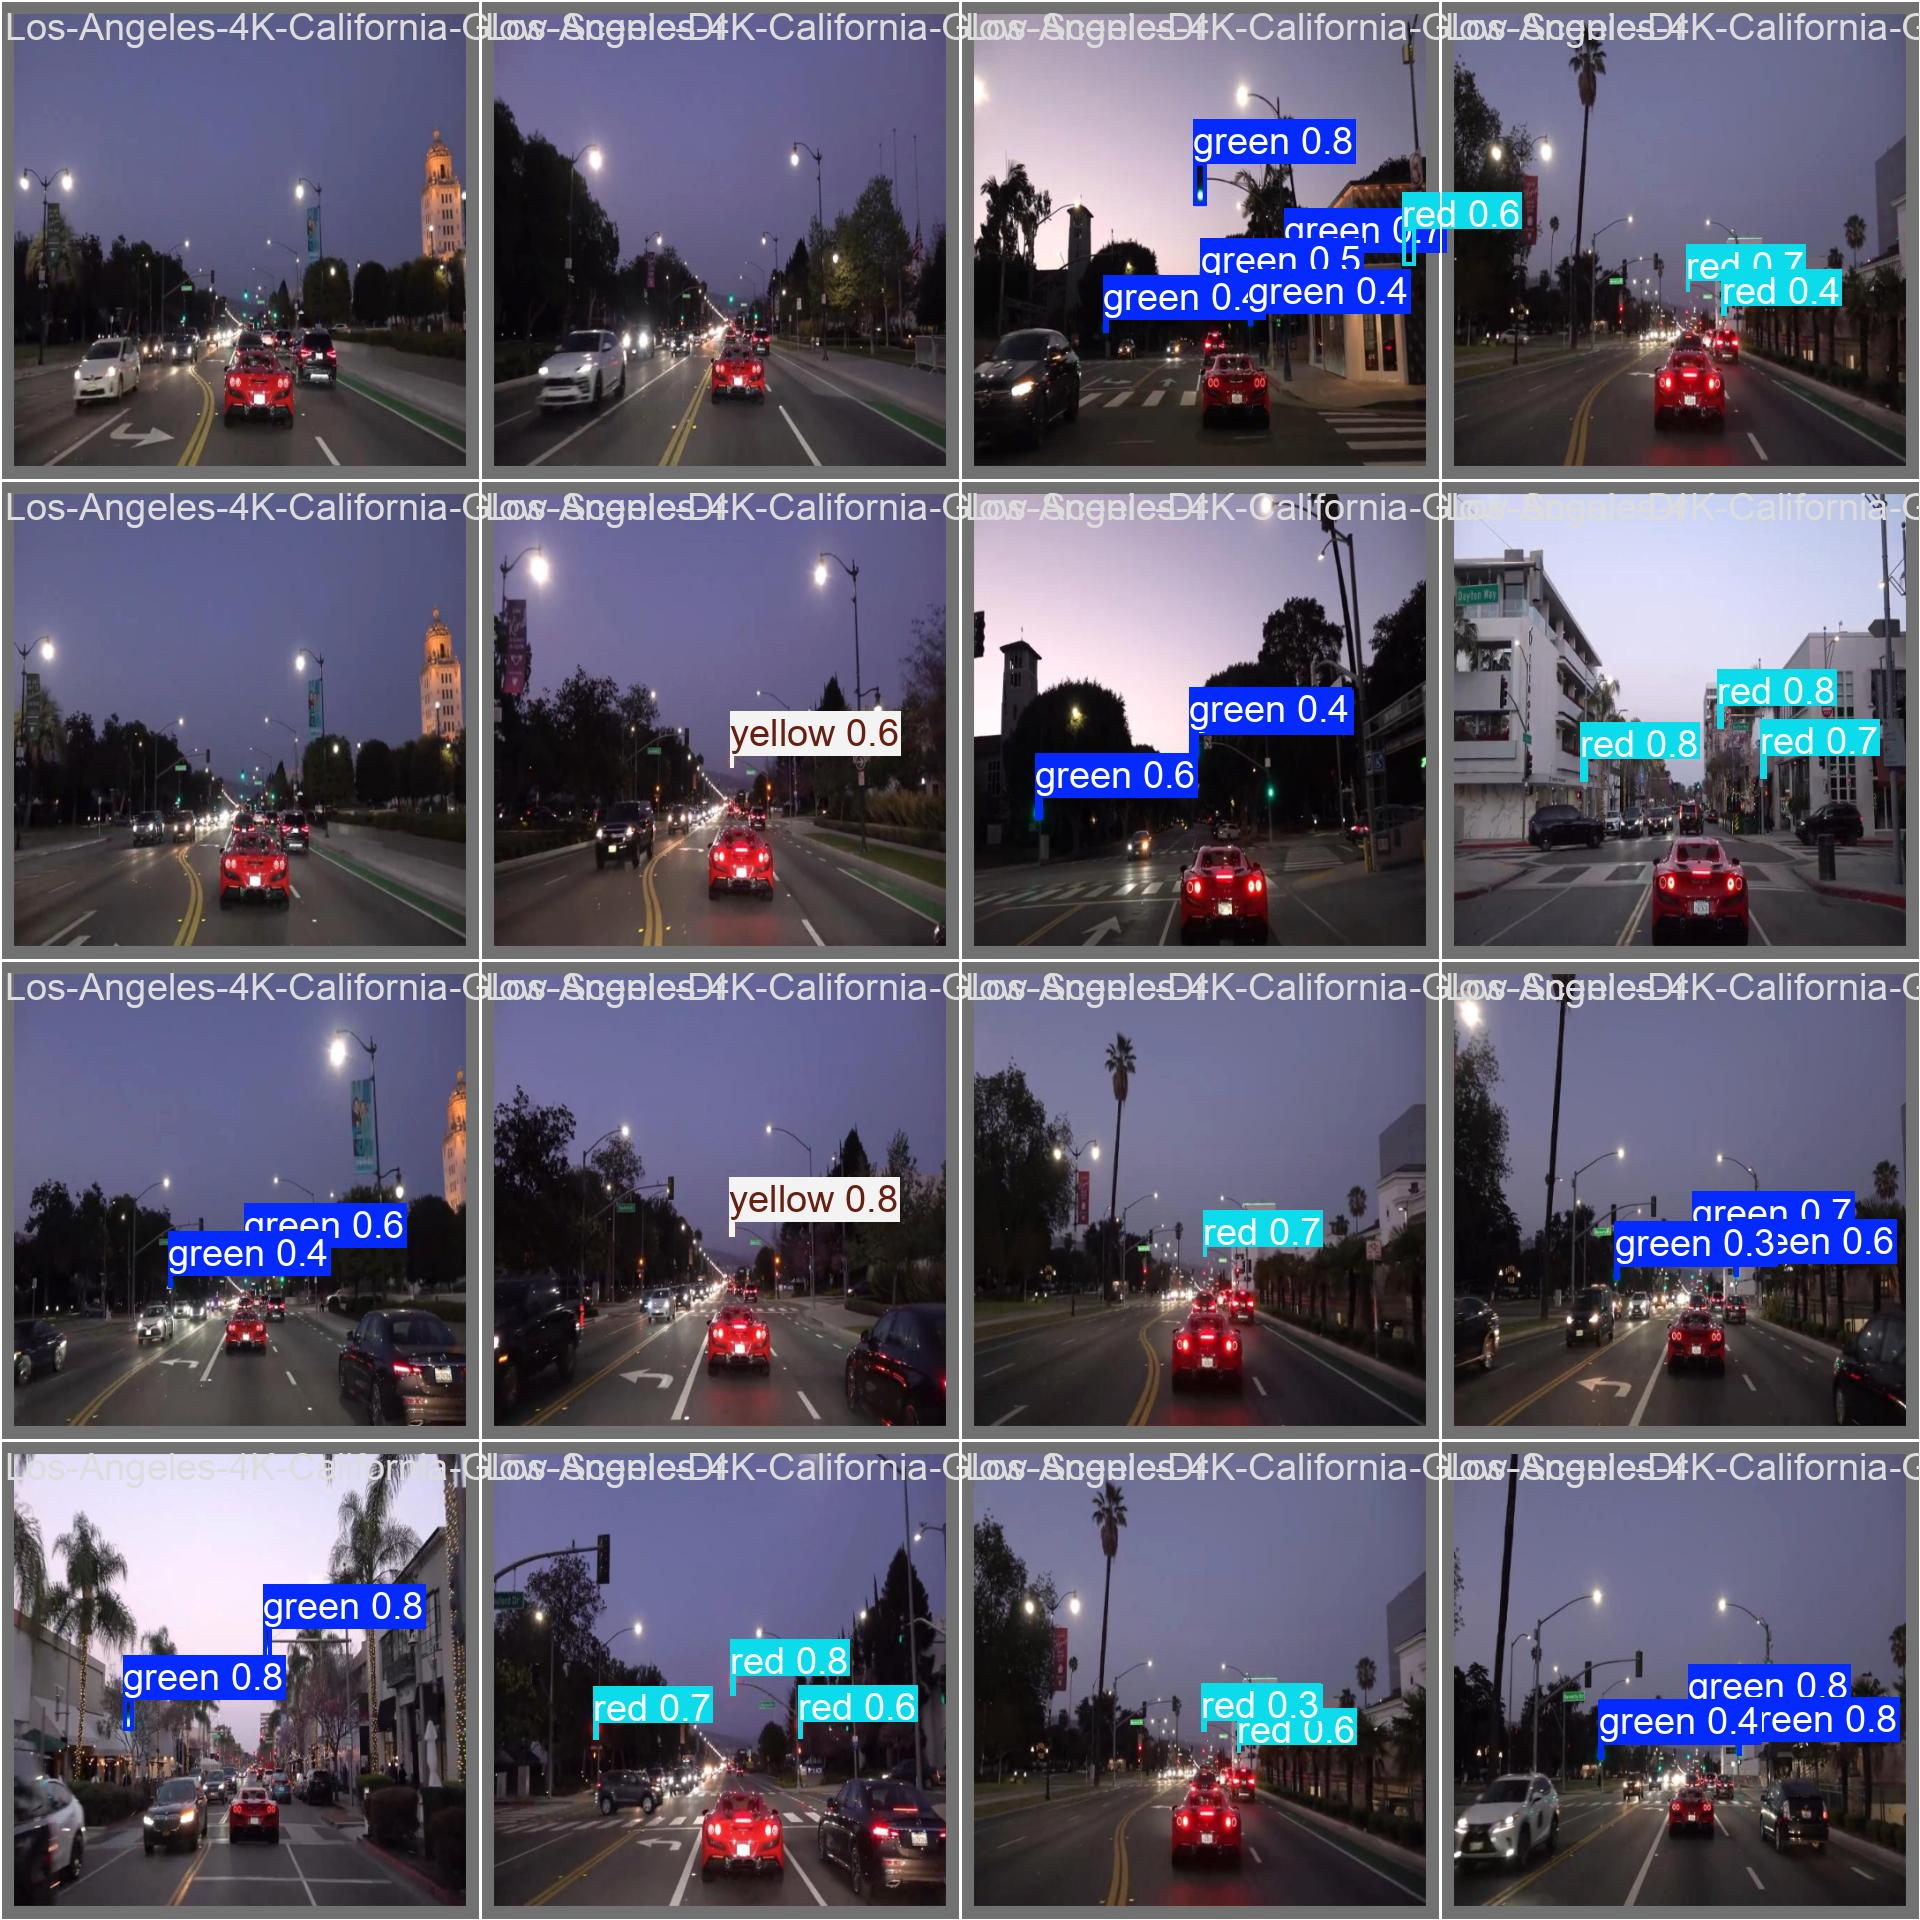

In [ ]:
from IPython.display import Image

Image(filename=f'/content/nirikshan_Yolo11_model/nirikshan3/val_batch2_pred.jpg', width=600)

In [ ]:
# 1. Charger le modèle entraîné
model = YOLO("/content/best.pt")
# 2. Évaluer le modèle sur un jeu de données
results = model.val(data="/content/traffic-lights-3/data.yaml")  # chemin vers le fichier YAML du dataset

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 741.5±223.1 MB/s, size: 35.5 KB)


val: Scanning /content/traffic-lights-3/valid/labels.cache... 1755 images, 125 backgrounds, 0 corrupt: 100%|██████████| 1755/1755 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [00:10<00:00, 10.88it/s]


                   all       1755       2568      0.955      0.942      0.973       0.74
                 green        800       1080      0.966      0.942      0.974      0.756
                   red        722       1318      0.952      0.939      0.971      0.665
                yellow        161        170      0.946      0.947      0.974      0.797
Speed: 0.2ms preprocess, 1.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val2


**Prédiction sur une vidéo**

In [ ]:
!yolo task=detect mode=predict model=/content/best.pt conf=0.75 source=/content/vid.mp4

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs

video 1/1 (frame 1/256) /content/vid.mp4: 320x512 (no detections), 62.7ms
video 1/1 (frame 2/256) /content/vid.mp4: 320x512 (no detections), 13.4ms
video 1/1 (frame 3/256) /content/vid.mp4: 320x512 (no detections), 12.7ms
video 1/1 (frame 4/256) /content/vid.mp4: 320x512 (no detections), 12.6ms
video 1/1 (frame 5/256) /content/vid.mp4: 320x512 (no detections), 12.9ms
video 1/1 (frame 6/256) /content/vid.mp4: 320x512 (no detections), 13.4ms
video 1/1 (frame 7/256) /content/vid.mp4: 320x512 (no detections), 12.7ms
video 1/1 (frame 8/256) /content/vid.mp4: 320x512 (no detections), 12.3ms
video 1/1 (frame 9/256) /content/vid.mp4: 320x512 (no detections), 12.2ms
video 1/1 (frame 10/256) /content/vid.mp4: 320x512 (no detections), 12.2ms
video 1/1 (frame 11/256) /content/vid.mp4: 320x512 (no detections), 12.3ms
vi

In [ ]:
from google.colab import files
files.download('/content/runs/detect/predict3/vid.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>